# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
!pip install scipy
# Import coo_matrix from scipy.sparse instead of spicy.sparse
from scipy.sparse import coo_matrix


# **Data Collection and Cleaning**

In [ ]:
#Read the dataset
training_data=pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20210101_20210228__5k_data.tsv',sep='\t')
training_data.head(4)

,Uniq Id,Crawl Timestamp,Product Id,Product Company Type Source,Product Category Group Code,Product Category Code,Product Market Code,Product Sector Code,Product Brand Code,Retailer,...,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key,Expected Category Count,Expected Brand Count
0,fc3abbe975e3df4784884da65bae9cc3,2021-02-02T16:41:45+00:00,eec8538d7c15e99e2ab4185435e5ecf8,Competitor,CH1944,CH2341,CH1095,CH1054,BZ1000,walmart.com,...,https://i5.walmartimages.com/asr/c08c0e86-57ed...,NaN,"Star Brite Mildew Stain Remover, 16 oz, Wal-ma...",NaN,NaN,81.0,NaN,902a36b04f45041c32b7fc32fcf9770d,NaN,0.0
1,1aef3a5f0252ffbf2b1087d85ae3e151,2021-02-02T17:33:14+00:00,29c8a6e8d3ea79edfaa3764d143cb672,Competitor,CH1944,CH2341,CH1095,CH1054,BZ1000,walmart.com,...,https://i5.walmartimages.com/asr/6c4d2602-b227...,NaN,"Energizer Ultimate Lithium AA Batteries, Doubl...",NaN,NaN,155.0,NaN,f038bbe44f729ff52cf5bb76e3bb9269,NaN,0.0
2,a4ced24933465e5aac360415cfe9833d,2021-02-03T21:56:07+00:00,c7be65f56e6424ed0a5994a1f55f0911,Competitor,CH1945,CH1118,CH1104,CH0117,BZ1000,walmart.com,...,https://i5.walmartimages.com/asr/18ba34a1-87b1...,NaN,"Carefree Acti-Fresh Daily Liners, Regular, Uns...",NaN,NaN,13060.0,NaN,5e7cef2866e305964e860d9d6b6b06c2,NaN,0.0
3,e363ae6b46f4e0f21943a0f71c06f612,2021-01-29T00:36:22+00:00,5002240000559679400000002000000000067907346US,Unilever,CH1945,CH1116,CH1201,CH0089,BZ1000,walmart.com,...,https://i5.walmartimages.com/asr/e4e2398b-f817...,NaN,"TRESemme Keratin Smooth Regimen Pack, 25 oz, T...",NaN,NaN,4.0,NaN,92999022098af6251897649caae7bb05,NaN,0.0


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      2256 non-null   object 
 1   Crawl Timestamp              2256 non-null   object 
 2   Product Id                   2256 non-null   object 
 3   Product Company Type Source  2256 non-null   object 
 4   Product Category Group Code  2256 non-null   object 
 5   Product Category Code        2256 non-null   object 
 6   Product Market Code          2256 non-null   object 
 7   Product Sector Code          2256 non-null   object 
 8   Product Brand Code           2256 non-null   object 
 9   Retailer                     2256 non-null   object 
 10  Product Category             2251 non-null   object 
 11  Product Brand                2248 non-null   object 
 12  Product Name                 2256 non-null   object 
 13  Product Price     

First we will decide which columns we are going to use for our project so we will select those columns only

In [ ]:
training_data=training_data[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Url','Product Description','Product Tags']]

In [ ]:
training_data.head(2)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Url,Product Description,Product Tags
0,fc3abbe975e3df4784884da65bae9cc3,eec8538d7c15e99e2ab4185435e5ecf8,NaN,81.0,Household Essentials > Cleaning Supplies > All...,Star Brite,"Star Brite Mildew Stain Remover, 16 oz",https://www.walmart.com/ip/Star-Brite-Mildew-S...,Get quick cleaning results with the Star Brite...,"Star Brite Mildew Stain Remover, 16 oz, Wal-ma..."
1,1aef3a5f0252ffbf2b1087d85ae3e151,29c8a6e8d3ea79edfaa3764d143cb672,NaN,155.0,Household Essentials > Batteries > AA Batteries,Energizer,"Energizer Ultimate Lithium AA Batteries, Doubl...",https://www.walmart.com/ip/Energizer-Ultimate-...,Nothing outlasts the long-lasting power of Ene...,"Energizer Ultimate Lithium AA Batteries, Doubl..."


In [ ]:
training_data.isnull().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,2256
Product Reviews Count,1
Product Category,5
Product Brand,8
Product Name,0
Product Url,0
Product Description,442
Product Tags,1


In [ ]:
#Fill missing value
training_data['Product Reviews Count'].fillna(0,inplace=True)
training_data['Product Description'].fillna('',inplace=True)
training_data['Product Tags'].fillna('',inplace=True)
training_data['Product Rating'].fillna(0,inplace=True)
training_data['Product Category'].fillna('',inplace=True)
training_data['Product Brand'].fillna('',inplace=True)



<ipython-input-7-4096f210f92b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data['Product Reviews Count'].fillna(0,inplace=True)
<ipython-input-7-4096f210f92b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
training_data.isnull().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,0
Product Reviews Count,0
Product Category,0
Product Brand,0
Product Name,0
Product Url,0
Product Description,0
Product Tags,0


In [ ]:
training_data.duplicated().sum()

0

In [ ]:
#Here we are going to make our coulmn names shorter
#Define the mapping of current coulmn names to shorter names\
short_column_names = {
    'Uniq Id': 'ID',
    'Product Id': 'Product_id',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'Reviews_count',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Url': 'Url',
    'Product Description': 'Description',
    'Product Tags': 'Tags'
}

training_data.rename(columns=short_column_names, inplace=True)

In [ ]:
training_data.head(1)

,ID,Product_id,Rating,Reviews_count,Category,Brand,Name,Url,Description,Tags
0,fc3abbe975e3df4784884da65bae9cc3,eec8538d7c15e99e2ab4185435e5ecf8,0.0,81.0,Household Essentials > Cleaning Supplies > All...,Star Brite,"Star Brite Mildew Stain Remover, 16 oz",https://www.walmart.com/ip/Star-Brite-Mildew-S...,Get quick cleaning results with the Star Brite...,"Star Brite Mildew Stain Remover, 16 oz, Wal-ma..."


In [ ]:
#We want only integers in ID and Product ID
training_data['ID']=training_data['ID'].str.extract(r'(\d+)').astype(float)
training_data['Product_id']=training_data['Product_id'].str.extract(r'(\d+)').astype(float)

In [ ]:
training_data.head(1)

,ID,Product_id,Rating,Reviews_count,Category,Brand,Name,Url,Description,Tags
0,3.0,8538.0,0.0,81.0,Household Essentials > Cleaning Supplies > All...,Star Brite,"Star Brite Mildew Stain Remover, 16 oz",https://www.walmart.com/ip/Star-Brite-Mildew-S...,Get quick cleaning results with the Star Brite...,"Star Brite Mildew Stain Remover, 16 oz, Wal-ma..."


# **EDA(Exploratory Data Analysis)**

In [ ]:
#Basic statistics
number_of_users=training_data['ID'].nunique()
number_of_products=training_data['Product_id'].nunique()
num_of_ratings=training_data['Rating'].count()
print(f'Number of users: {number_of_users}')
print(f'Number of products: {number_of_products}')
print(f'Number of ratings: {num_of_ratings}')

Number of users: 859
Number of products: 885
Number of ratings: 2256


<function matplotlib.pyplot.show(close=None, block=None)>

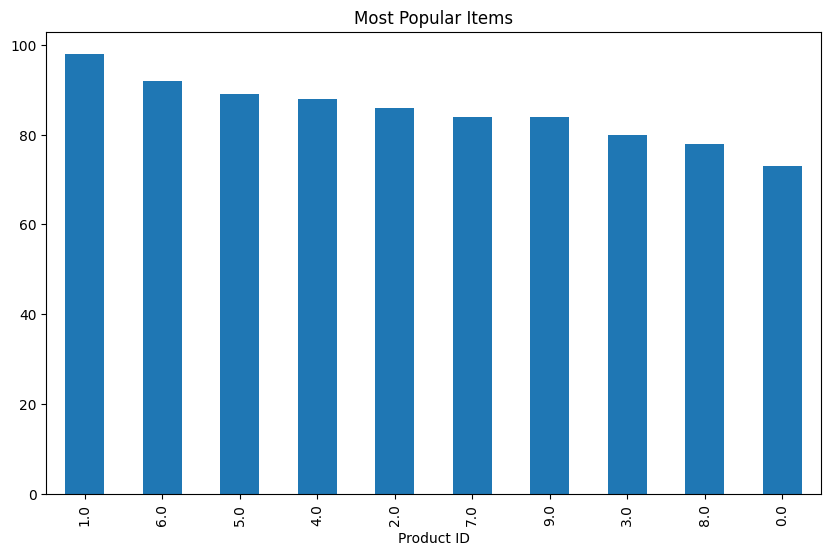

In [ ]:
#Most popular items

popular_items=training_data['Product_id'].value_counts().head(10)
popular_items.plot(kind='bar',figsize=(10,6))
plt.title('Most Popular Items')
plt.xlabel('Product ID')
#plt.ylabel('Number of Ratings')
plt.show


# **Tags Creation**



In [ ]:
#install spacy
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp=spacy.load('en_core_web_sm')


In [ ]:
def clean_and_extract_tags(text):
  doc=nlp(text.lower())
  tags=[token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
  return ', '.join(tags)


columns_for_tags_extraction=['Category','Brand','Description']

for column in columns_for_tags_extraction:
  training_data[f'{column}_tags']=training_data[column].apply(clean_and_extract_tags)

In [ ]:
#Concatenate the cleaned tags from all relevant columns
training_data['Tags']=training_data[columns_for_tags_extraction].apply(lambda row: ', '.join(row),axis=1)

In [ ]:
training_data['Rating']

,Rating
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2251,0.0
2252,0.0
2253,0.0
2254,0.0


# **Rating Base Recommendations Systems**

When we come across an e-commerece website for the first time it shows us the top rated products

In [ ]:
if 'Rating' in training_data.columns:
    # Assign random ratings between 1 and 5
    training_data['Rating'] = np.random.randint(1, 6, size=len(training_data))
else:
    print("The 'Rating' column does not exist in the dataset.")

# Save the updated dataset as a .tsv file
# Replace 'updated_dataset.tsv' with the desired output file name
training_data.to_csv('updated_dataset.tsv', sep='\t', index=False)

print("Ratings updated successfully!")

Ratings updated successfully!


In [ ]:
#change the existing dataset with only 5 columns dataset 'Name','Rating','Reviews_count','Brand','Url'
newest_dataset=training_data[['Name','Rating','Reviews_count','Brand','Url']]
#Download a csv file of the above dataset
newest_dataset.to_csv('newest_dataset.csv',index=False)

In [ ]:
average_ratings_2=training_data.groupby(['Name','Reviews_count','Brand','Url'])['Rating'].mean().reset_index()

In [ ]:

top_rated_products=average_ratings_2.sort_values(by='Rating',ascending=False).head(10)

In [ ]:
top_rated_products['Rating']=top_rated_products['Rating'].astype(int)
top_rated_products['Reviews_count']=top_rated_products['Reviews_count'].astype(int)

In [ ]:
print('Rating based Recommendation System:(Trending Products)')
top_rated_products[['Name','Rating','Reviews_count','Brand','Url']]=top_rated_products[['Name','Rating','Reviews_count','Brand','Url']]
top_rated_products

Rating based Recommendation System:(Trending Products)


,Name,Reviews_count,Brand,Url,Rating
1676,"Pine Glo Kitchen & Bath Cleaner, Lemon, 40 Oz",42,PINE GLO,https://www.walmart.com/ip/Pine-Glo-Kitchen-Ba...,5
394,Brow Powder Duo - Dark Brown by Anastasia Beve...,0,Anastasia Beverly Hills,https://www.walmart.com/ip/Brow-Powder-Duo-Dar...,5
1878,"Sally Hansen Insta-Dri Nail Color, Mint Sprint",4580,Sally Hansen,https://www.walmart.com/ip/Sally-Hansen-Insta-...,5
845,Finally Hair White 25g Refill Bag - Hair Build...,3,AG Hair,https://www.walmart.com/ip/Finally-Hair-White-...,5
844,"Febreze Small Spaces Air Fresheners, Wild Berr...",338,Febreze,https://www.walmart.com/ip/Febreze-Small-Space...,5
1426,NO SWEAT BUNDLE! with Anti-Monkey Butt Powder ...,0,Fresh Balls,https://www.walmart.com/ip/NO-SWEAT-BUNDLE-wit...,5
1427,"NOW Essential Oils, Cinnamon Cassia Oil, Warmi...",24,NOW,https://www.walmart.com/ip/NOW-Essential-Oils-...,5
841,Febreze Plug Starter Kit,31,Febreze,https://www.walmart.com/ip/Febreze-Plug-Starte...,5
839,Febreze Pet Odor Eliminator Oxy Formula for Fu...,283,Febreze,https://www.walmart.com/ip/Febreze-Pet-Odor-El...,5
926,Global Keratin GKhair Moisturizing Shampoo Col...,5,GK Hair,https://www.walmart.com/ip/Global-Keratin-GKha...,5


# Content Based Recommendation (User Preferences or Items similarities)

This is based on what the user has previously scene

In [ ]:
training_data.head(1)

,ID,Product_id,Rating,Reviews_count,Category,Brand,Name,Url,Description,Tags,Category_tags,Brand_tags,Description_tags
0,3.0,8538.0,4,81.0,Household Essentials > Cleaning Supplies > All...,Star Brite,"Star Brite Mildew Stain Remover, 16 oz",https://www.walmart.com/ip/Star-Brite-Mildew-S...,Get quick cleaning results with the Star Brite...,Household Essentials > Cleaning Supplies > All...,"household, essentials, cleaning, supplies, pur...","star, brite","quick, cleaning, results, star, brite, mildew,..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidfVectorizer_A = TfidfVectorizer(stop_words='english') # Change the instance name from TfidfVectorizer to tfidfVectorizer_A
TfidfVectorizer_matrix = tfidfVectorizer_A.fit_transform(training_data['Tags']) #Use the new variable name here

In [ ]:
cosine_sim=cosine_similarity(TfidfVectorizer_matrix,TfidfVectorizer_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.012343  , 0.01294431, ..., 0.        , 0.00376523,
        0.0038795 ],
       [0.012343  , 1.        , 0.02682984, ..., 0.01305627, 0.00153207,
        0.00157812],
       [0.01294431, 0.02682984, 1.        , ..., 0.06059778, 0.00688482,
        0.07890532],
       ...,
       [0.        , 0.01305627, 0.06059778, ..., 1.        , 0.00190625,
        0.05829302],
       [0.00376523, 0.00153207, 0.00688482, ..., 0.00190625, 1.        ,
        0.01238766],
       [0.0038795 , 0.00157812, 0.07890532, ..., 0.05829302, 0.01238766,
        1.        ]])

In [ ]:
training_data['Name'][0]

'Star Brite Mildew Stain Remover, 16 oz'

In [ ]:
item_index='Star Brite Mildew Stain Remover, 16 oz'
item_index_A=training_data[training_data['Name']==item_index].index[0]

In [ ]:
cosine_sim[item_index_A]

array([1.        , 0.012343  , 0.01294431, ..., 0.        , 0.00376523,
       0.0038795 ])

In [ ]:
similar_items=list(enumerate(cosine_sim[item_index_A]))
similar_items=sorted(similar_items,key=lambda x:x[1],reverse=True)

In [ ]:
top_similar_items=similar_items[1:10]
recommended_items_indices=[i[0] for i in top_similar_items]


In [ ]:
training_data.iloc[recommended_items_indices][['Name','Reviews_count','Brand']]

,Name,Reviews_count,Brand
2078,RMR-86 Instant Mold Stain & Mildew Stain Remover,44.0,RMR Brands
1755,MOLD ARMOR Mold and Mildew Killer + Quick Stai...,87.0,Mold Armor
1092,Retainer Brite Retainer brite -6 months supply...,1.0,Retainer Brite
1287,"Iron Out Automatic Toilet Bowl Cleaner, 6 Tabl...",12.0,Iron OUT
1576,"Simple Green All-Purpose Cleaner, 32 fl oz",500.0,Simple Green
210,Scotch-Brite Sponge Cloth,32.0,3M
31,Scotch-Brite ocelo Anti-Microbial Utility Spon...,52.0,Scotch-Brite
666,Scrubbing Bubbles Disinfectant Bathroom Grime ...,304.0,Scrubbing Bubbles
1323,Oral-B Kids Star Wars Electric Toothbrush and ...,3.0,Oral-B


# **Function to Recommend Products for Content Base**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(training_data,itme_name,top_n=10):
  #Check if the item exists in the training data
  if item_name not in training_data['Name'].values:
    print(f"Item '{item_name}' not found in the training data.")
    return pd.DataFrame()
  #Create a TF-IDF vectorizer for item descriptions
  tfidf_vectorizer=TfidfVectorizer(stop_words='english')
  #Fit and transform the item descriptions
  item_description_matrix=tfidf_vectorizer.fit_transform(training_data['Tags'])
  #Calculate the cosine similarity between items
  cosine_sim=cosine_similarity(item_description_matrix,item_description_matrix)
  #Get the index of the item
  item_index=training_data[training_data['Name']==item_name].index[0]
  #Get the similarity scores for the item
  similar_items=list(enumerate(cosine_sim[item_index]))
  #sort similar items by similarity score in descending order
  similar_items=sorted(similar_items,key=lambda x:x[1],reverse=True)
  #Get the top-n similar items
  top_similar_items=similar_items[1:top_n+1]
  #Get the indices of the top similar items
  recommended_items_indices=[i[0] for i in top_similar_items]
  #Get the recommended items from the training data
  recommended_items=training_data.iloc[recommended_items_indices][['Name','Reviews_count','Brand','Url','Rating']]
  return recommended_items


In [ ]:
#Example
item_name='Star Brite Mildew Stain Remover, 16 oz'
recommended_items=content_based_recommendations(training_data,item_name)
print(f"Recommended items for '{item_name}':")
recommended_items

Recommended items for 'Star Brite Mildew Stain Remover, 16 oz':


,Name,Reviews_count,Brand,Url,Rating
2078,RMR-86 Instant Mold Stain & Mildew Stain Remover,44.0,RMR Brands,https://www.walmart.com/ip/RMR-86-Instant-Mold...,4
1755,MOLD ARMOR Mold and Mildew Killer + Quick Stai...,87.0,Mold Armor,https://www.walmart.com/ip/MOLD-ARMOR-Mold-and...,1
1092,Retainer Brite Retainer brite -6 months supply...,1.0,Retainer Brite,https://www.walmart.com/ip/Retainer-Brite-Reta...,1
1287,"Iron Out Automatic Toilet Bowl Cleaner, 6 Tabl...",12.0,Iron OUT,https://www.walmart.com/ip/Iron-Out-Automatic-...,5
1576,"Simple Green All-Purpose Cleaner, 32 fl oz",500.0,Simple Green,https://www.walmart.com/ip/Simple-Green-All-Pu...,5
210,Scotch-Brite Sponge Cloth,32.0,3M,https://www.walmart.com/ip/Scotch-Brite-Sponge...,5
31,Scotch-Brite ocelo Anti-Microbial Utility Spon...,52.0,Scotch-Brite,https://www.walmart.com/ip/Scotch-Brite-ocelo-...,1
666,Scrubbing Bubbles Disinfectant Bathroom Grime ...,304.0,Scrubbing Bubbles,https://www.walmart.com/ip/Scrubbing-Bubbles-D...,4
1323,Oral-B Kids Star Wars Electric Toothbrush and ...,3.0,Oral-B,https://www.walmart.com/ip/Oral-B-Kid-s-Star-W...,5
1332,HurriClean Automatic Toilet & Tank Cleaner,56.0,Hurriclean,https://www.walmart.com/ip/HurriClean-Automati...,4


# **Collabrative Filtering**

It is a technique used in recommendation systems to make predictions about a user's preferences based on the preferences of many users(user-item rating matrix)

**Steps:**

**1.Compute Similarity Between users**: Use a similarity measure like cosine similarity or Person Correlation to find users who have similar preferances.

**2.Select neighbors:**Choose a subset of similar users(neighbours)

**3.Recommend Items:**Recommend items that the neighbors have rated highly but the target user hasn't rated yet.

In [ ]:
user_item_matrix=training_data.pivot_table(index='ID',columns='Product_id',values='Rating',aggfunc='mean').fillna(0)

In [ ]:
cosine_similarity(user_item_matrix)
user_similarity=cosine_similarity(user_item_matrix)

In [ ]:
target_id=4
target_user_index=user_item_matrix.index.get_loc(target_id)

In [ ]:
user_similarities=user_similarity[target_user_index]
similar_user_indices=user_similarities.argsort()[::-1][1:]

In [ ]:
recommended_items=[]
for user_index in similar_user_indices:
  rated_by_similar_user=user_item_matrix.iloc[user_index]
  not_rated_by_target_user=(rated_by_similar_user==0) &(user_item_matrix.iloc[target_user_index]==0)
  recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])


In [ ]:
recommended_items_details=training_data[training_data['Product_id'].isin(recommended_items)][['Name','Reviews_count','Brand','Url','Rating']]

# **Function that Recommends Items**

In [ ]:
#Generate Recommendations based on similar users
def collabrative_recommendations(training_data,target_id,top_n=10):
  user_item_matrix=training_data.pivot_table(index='ID',columns='Product_id',values='Rating',aggfunc='mean').fillna(0)
  user_similarity=cosine_similarity(user_item_matrix)
  target_user_index=user_item_matrix.index.get_loc(target_id)
  user_similarities=user_similarity[target_user_index]
  similar_user_indices=user_similarities.argsort()[::-1][1:]
  recommended_items=[]
  for user_index in similar_user_indices:
    rated_by_similar_user=user_item_matrix.iloc[user_index]
    not_rated_by_target_user=(rated_by_similar_user==0) &(user_item_matrix.iloc[target_user_index]==0)
    recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])
  recommended_items_details=training_data[training_data['Product_id'].isin(recommended_items)][['Name','Reviews_count','Brand','Url','Rating']]
  return recommended_items_details.head(5)

target_id=4
top_n=5
recommended_items=collabrative_recommendations(training_data,target_id,top_n)
print(f"Recommended items for user {target_id}:")
recommended_items


Recommended items for user 4:


,Name,Reviews_count,Brand,Url,Rating
5,Borlind Annemarie Borlind LL Regeneration Eye ...,0.0,Annemarie Börlind,https://www.walmart.com/ip/Borlind-Annemarie-B...,1
6,CLEAN & CLEAR Morning Burst Oil-Free Hydrating...,100.0,Clean & Clear,https://www.walmart.com/ip/CLEAN-CLEAR-Morning...,5
9,Maybelline Color Sensational Pearls Lipcolor -...,9.0,Maybelline,https://www.walmart.com/ip/Maybelline-Color-Se...,3
12,"Vanity Fair Everyday Paper Napkins, 660 Count",1536.0,Vanity Fair,https://www.walmart.com/ip/Vanity-Fair-Everyda...,5
28,Biosilk Color Therapy Shampoo - 12 oz Shampoo,0.0,BioSilk,https://www.walmart.com/ip/Biosilk-Color-Thera...,3


# **Hybrid Recommendation Systems**

Hybrid recommendation System combines two or more recommendation techniques to leverage the strength of each and mitigate their weaknesses(i.e., Content based filtering , Collabrative Filtering)

In [ ]:
def hybrid_recommendation(training_data,target_id,item_name,top_n=10):
  #Get content-based recommendations
  content_based_rec=content_based_recommendations(training_data,item_name,top_n)
  #Get collabrative filtering recommendations
  collabrative_filtering_recommendations=collabrative_recommendations(training_data,target_id,top_n)
  hybrid_recommendations=pd.concat([content_based_rec,collabrative_filtering_recommendations]).drop_duplicates()
  return hybrid_recommendations
  #Combine the recommendations

In [ ]:
target_id=4
item_name='Star Brite Mildew Stain Remover, 16 oz'
hybrid_recommendations=hybrid_recommendation(training_data,target_id,item_name,top_n=10)
print("Hybrid Recommendation System:")
hybrid_recommendations

Hybrid Recommendation System:


,Name,Reviews_count,Brand,Url,Rating
2078,RMR-86 Instant Mold Stain & Mildew Stain Remover,44.0,RMR Brands,https://www.walmart.com/ip/RMR-86-Instant-Mold...,4
1755,MOLD ARMOR Mold and Mildew Killer + Quick Stai...,87.0,Mold Armor,https://www.walmart.com/ip/MOLD-ARMOR-Mold-and...,1
1092,Retainer Brite Retainer brite -6 months supply...,1.0,Retainer Brite,https://www.walmart.com/ip/Retainer-Brite-Reta...,1
1287,"Iron Out Automatic Toilet Bowl Cleaner, 6 Tabl...",12.0,Iron OUT,https://www.walmart.com/ip/Iron-Out-Automatic-...,5
1576,"Simple Green All-Purpose Cleaner, 32 fl oz",500.0,Simple Green,https://www.walmart.com/ip/Simple-Green-All-Pu...,5
210,Scotch-Brite Sponge Cloth,32.0,3M,https://www.walmart.com/ip/Scotch-Brite-Sponge...,5
31,Scotch-Brite ocelo Anti-Microbial Utility Spon...,52.0,Scotch-Brite,https://www.walmart.com/ip/Scotch-Brite-ocelo-...,1
666,Scrubbing Bubbles Disinfectant Bathroom Grime ...,304.0,Scrubbing Bubbles,https://www.walmart.com/ip/Scrubbing-Bubbles-D...,4
1323,Oral-B Kids Star Wars Electric Toothbrush and ...,3.0,Oral-B,https://www.walmart.com/ip/Oral-B-Kid-s-Star-W...,5
1332,HurriClean Automatic Toilet & Tank Cleaner,56.0,Hurriclean,https://www.walmart.com/ip/HurriClean-Automati...,4


In [ ]:
clean=pd.read_csv('clean_data.csv')
#Randomly

,Unnamed: 0,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,0,1705736792,2,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"premium, beauty, premium, makeup, premium, nai..."
1,1,95,76,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,2,8,8,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,3,4,3,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,4,990,3,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."
